In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10002, dtype: int64


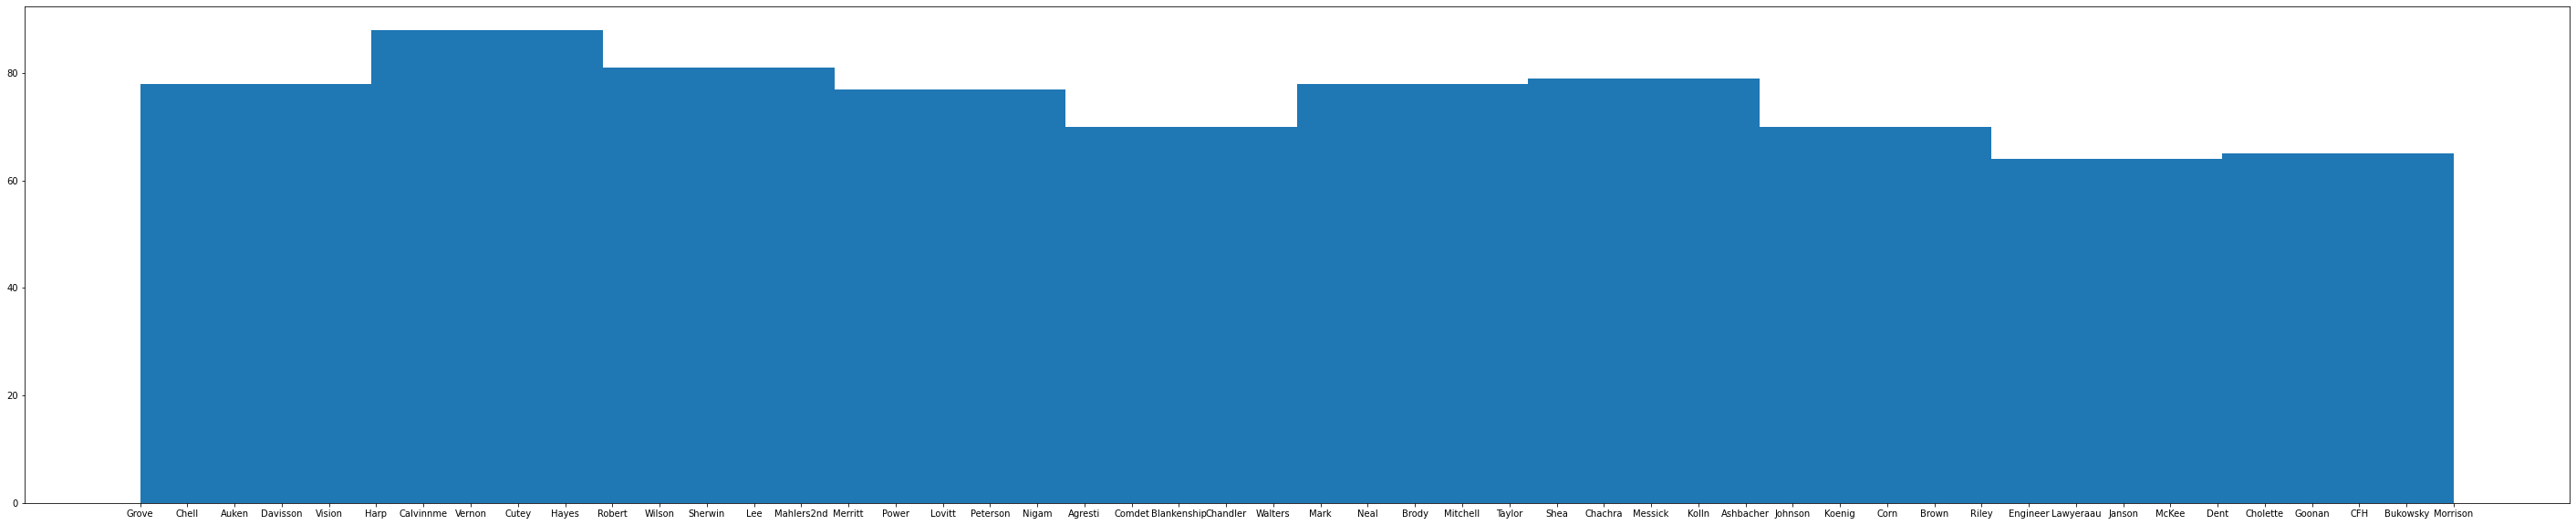

Running XGBoost...


KeyboardInterrupt: 

In [10]:
# Check for missing values
print(data.isnull().sum())

# Check for outliers
plt.figure(figsize = (50,10))
plt.hist(data['Class'], bin = 15)
plt.show()

# Remove outliers
#data = data[data['Volume'] < 50]

# Encode categorical variables (if any)
# No categorical variables in this dataset

#Transform Class column to 0 and 1 column : Kecimen = 1 and Besni = 0
#L = data["Class"].unique()
#for l in data["Class"].unique():
    #data[f"{l}"] = np.where(data["Class"] == l, 1,0)

#data.drop(columns=["Class", "ID"], inplace = True)

# Split the data into training and test sets
#X = data.drop(L, axis=1)
#y = data[L]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Drop the ID column as it is not needed for analysis
data.drop(['ID'], axis=1, inplace=True)

# Split the features and the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert the target variable to binary labels
y = pd.get_dummies(y, drop_first=True)

# Scale the features to have zero mean and unit variance

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
y = data['Class'].values
y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define the classifiers and their parameter grids
classifiers = {
    #'Random Forest': (RandomForestClassifier(),
                      #{'n_estimators': [50, 100, 200],
                       #'criterion': ['gini', 'entropy'],
                       #'max_depth': [2, 4, 6, 8, 10]}),
    #'Support Vector Machine': (SVC(),
                               #{'C': [0.01, 0.1, 1, 10, 100],
                                #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                #'degree': [2, 3, 4],
                                #'gamma': ['scale', 'auto']}),
    'XGBoost': (XGBClassifier(objective = 'multi:softmax'),
                {'learning_rate': [0.01, 0.1, 0.5],
                 'max_depth': [2, 4, 6, 8, 10],
                 'n_estimators': [50, 100, 200]})
}

# Train and evaluate the classifiers
results = {}
for name, (classifier, param_grid) in classifiers.items():
    print(f'Running {name}...')
    grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted'),
        'fit_time': grid_search.cv_results_['mean_fit_time'].mean(),
        'score_time': grid_search.cv_results_['mean_score_time'].mean()
    }

# Print the results
for name, result in results.items():
    print(name)
    for measure, value in result.items():
        if measure != 'best_params':
            print(f'measure:  {measure}, value : {value}')


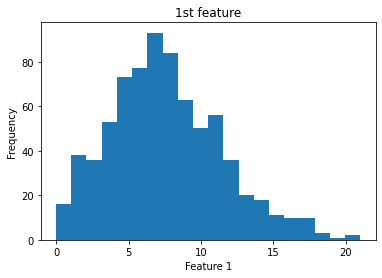

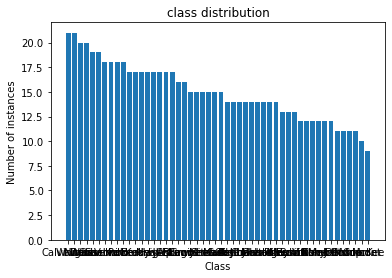

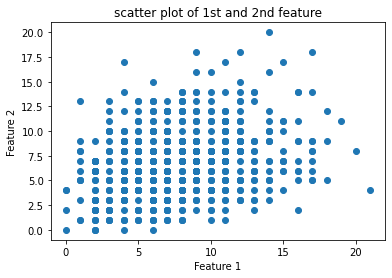

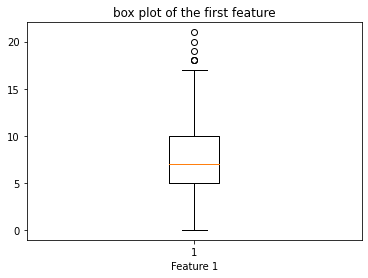

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram of the first feature
plt.hist(data.iloc[:, 1], bins=20)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('1st feature')
plt.show()

# Count the number of instances in each class
class_counts = data['Class'].value_counts()

# Plot a bar chart of class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('class distribution')
plt.show()

# Plot a scatter plot of the first and second features
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('scatter plot of 1st and 2nd feature')
plt.show()

# Plot a box plot of the first feature
plt.boxplot(data.iloc[:, 1])
plt.xlabel('Feature 1')
plt.title('box plot of the first feature')
plt.show()